In [84]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

# Basic Data Cleaning

In [85]:
# import csv file
df = pd.read_csv(r'C:\Users\Aaditya Kaul\Downloads\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv', encoding= 'unicode_escape')

In [82]:
df.shape #-> Gives the number of Rows and Columns in our data set.

(11251, 15)

In [86]:
df.head() #-> Shows the first five rows along with all the colunms from the data set.

User_ID  Cust_name Product_ID Gender Age Group  Age Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28        Married   
1  1000732     Kartik  P00110942      F     26-35   35      Unmarried   
2  1001990      Bindu  P00118542      F     26-35   35      Unmarried   
3  1001425     Sudevi  P00237842      M      0-17   16        Married   
4  1000588       Joni  P00057942      M     26-35   28      Unmarried   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     NaN       NaN  
3  23912.0     NaN       NaN  
4  23877.0     NaN       NaN

In [87]:
df.info() #-> Gives the summary of the whole data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  object 
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(3), object(9)
memory usage: 1.3+ MB


In [23]:
# We will remove unwanted/blank columns, which are "Status" and "unnamed1" in this case:
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

# 'axis=1' removes all the rows from the given column
# 'inplace=True' modifies the data frame

In [88]:
#Gives a more readable summary of null values in the data set:
# checking for null values:
pd.isnull(df).sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [26]:
# Removing the null values in the data set:
df.dropna(inplace = True)

In [28]:
# We can see that the unwanted data has been removed:
df.shape

(11239, 13)

In [29]:
# Changing the data type of 'Amount' column from float to int:
df["Amount"] = df["Amount"].astype(int)

In [33]:
# Checking the changed data type:
df["Amount"].dtype

dtype('int32')

In [34]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [42]:
# Renaming columns:
df.rename(columns = {"Cust_name" : "Customer_Name"}, inplace = True)

In [89]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

User_ID           Age        Orders        Amount  Status  \
count  1.125100e+04  11251.000000  11251.000000  11239.000000     0.0   
mean   1.003004e+06     35.421207      2.489290   9453.610858     NaN   
std    1.716125e+03     12.754122      1.115047   5222.355869     NaN   
min    1.000001e+06     12.000000      1.000000    188.000000     NaN   
25%    1.001492e+06     27.000000      1.500000   5443.000000     NaN   
50%    1.003065e+06     33.000000      2.000000   8109.000000     NaN   
75%    1.004430e+06     43.000000      3.000000  12675.000000     NaN   
max    1.006040e+06     92.000000      4.000000  23952.000000     NaN   

       unnamed1  
count       0.0  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [90]:
# Getting the description by using ".describe()" of certain columns:
df[['Age', 'Orders', 'Amount']].describe()

Age        Orders        Amount
count  11251.000000  11251.000000  11239.000000
mean      35.421207      2.489290   9453.610858
std       12.754122      1.115047   5222.355869
min       12.000000      1.000000    188.000000
25%       27.000000      1.500000   5443.000000
50%       33.000000      2.000000   8109.000000
75%       43.000000      3.000000  12675.000000
max       92.000000      4.000000  23952.000000

# Exploratory Data Analysis (EDA)


## Gender

In [43]:
df.columns

Index(['User_ID', 'Customer_Name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

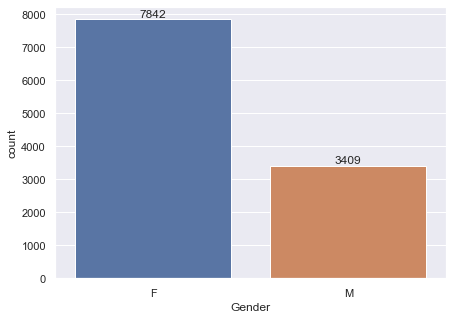

In [56]:
# Plotting a bar chart to show gender and it's count:

ax = sns.countplot(x = 'Gender',data = df)
sns.set(rc={'figure.figsize':(7,5)})


for bars in ax.containers:
    ax.bar_label(bars)

  Gender       Amount
0      F  74335856.43
1      M  31913276.00



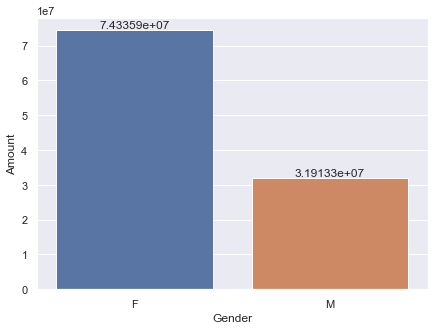

In [55]:
# Plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
print(sales_gen)
print()
sns.set(rc={'figure.figsize':(7,5)})


ax = sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

for bars in ax.containers:
    ax.bar_label(bars)

  Gender       Amount
0      F  9491.299340
1      M  9366.972703


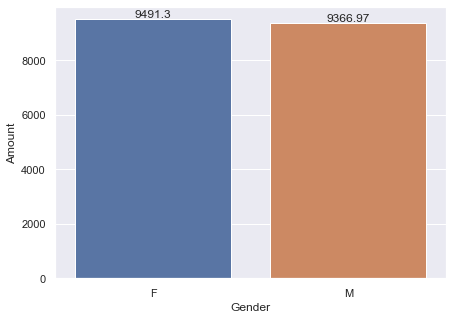

In [54]:
# Calculating the mean sales from both the genders:

mean_sales = df.groupby(['Gender'], as_index = False)['Amount'].mean().sort_values(by = 'Amount', ascending = False)
print(mean_sales)

sns.set(rc={'figure.figsize':(7,5)})

ax = sns.barplot(x = 'Gender', y= 'Amount' ,data = mean_sales)

for bars in ax.containers:
    ax.bar_label(bars)

##### As we can see from the above graphs, most of the buyers are females and thus spending more as total amount. But, as we can see from the final graph showing mean amounts, both the genders have spent almost equally as individuals.



## Age

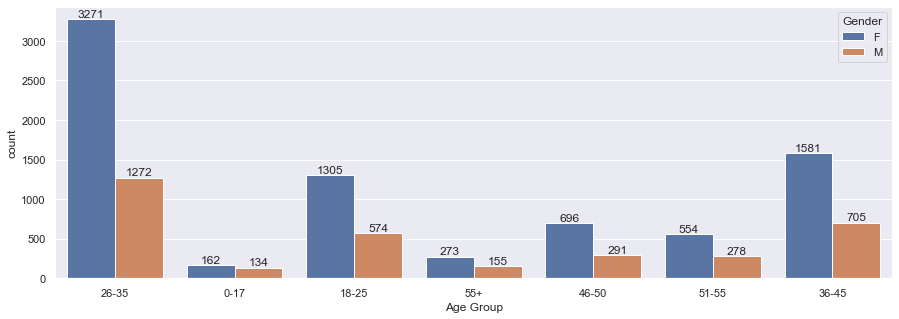

In [48]:
# Plotting a bar graph with age groups for both genders and their count:

ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

sns.set(rc={'figure.figsize':(15,5)})


for bars in ax.containers:
    ax.bar_label(bars)

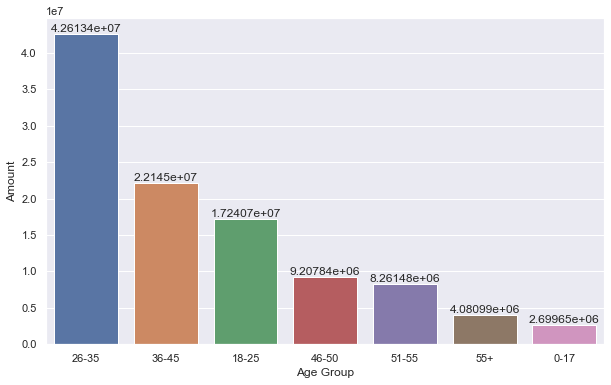

In [52]:
# Plotting a graph with age groups and total amount spent by both genders:

sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# fig, ax = plt.subplots(figsize=(10, 7))
sns.set(rc={'figure.figsize':(10,6)})


ax = sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

for bars in ax.containers:
    ax.bar_label(bars)

##### From the above graphs, we can conclude that most buyers are from the age group 26-35 with females count being higher. Also, the most amount spent by the people in the same age group of 26-35.

## State

<Axes: xlabel='State', ylabel='Orders'>

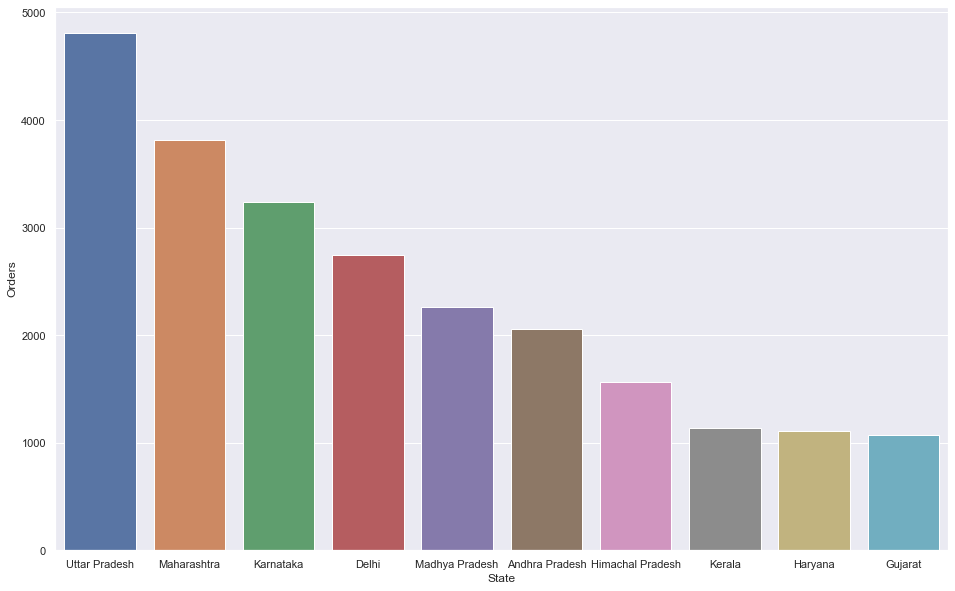

In [66]:
# Plotting the orders from top 10 states:

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,10)})

sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

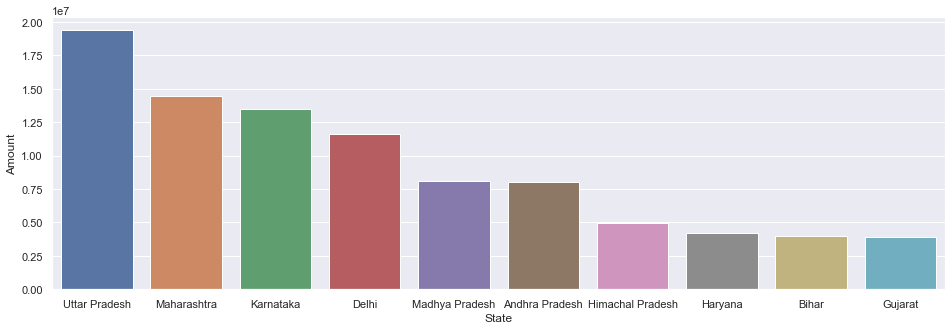

In [58]:
# Total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})

sns.barplot(data = sales_state, x = 'State',y= 'Amount')

##### As we can see from the above graph, the highest amount of orders and the sales are from Uttar Pradesh, Maharashtra and Karnataka.

## Marital Status

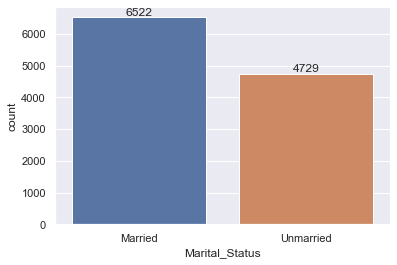

In [91]:
# Plotting the sales from unmarried(0) people and married(0) couples:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(5,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

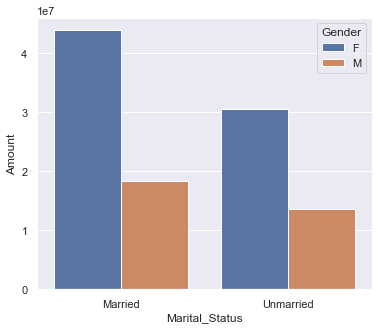

In [95]:
# Plotting sales from both genders based on their marital status:

sales_marital = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})

sns.barplot(data = sales_marital, x = 'Marital_Status',y= 'Amount', hue='Gender')

##### As we can see from the first graph, more number of unmarried people are buying goods as compared to married couples. In the second graph, sales from females is more in case of both, unmarried and married people.

## Occupation

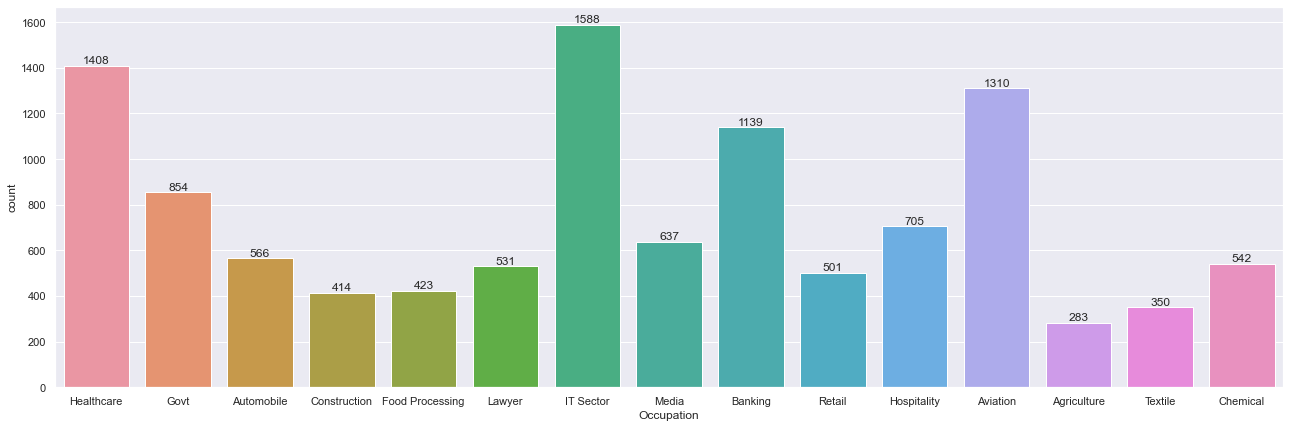

In [119]:
# Plotting a bar graph to show the occupations and their count:

ax = sns.countplot(data = df, x = 'Occupation')

sns.set(rc={'figure.figsize':(20,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

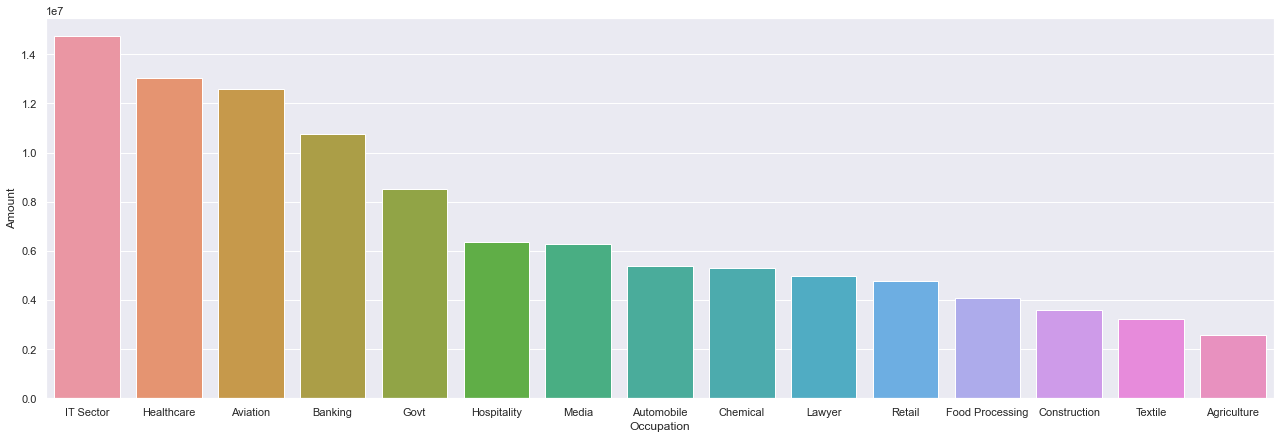

In [118]:
# Plotting a bar graph showing the sales from people of different occupations:

sales_occ = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by= 'Amount', ascending = True)

sns.set(rc={'figure.figsize':(22,7)})

sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

##### From the first graph, we can see that the people form IT, Healthcare and Aviation sectors constitute the most to the number of sales. From the second graph, we can conclude that people from the IT sector spent the most followed by the people working in Heallthcare and Aviation sectors.

## Product Category

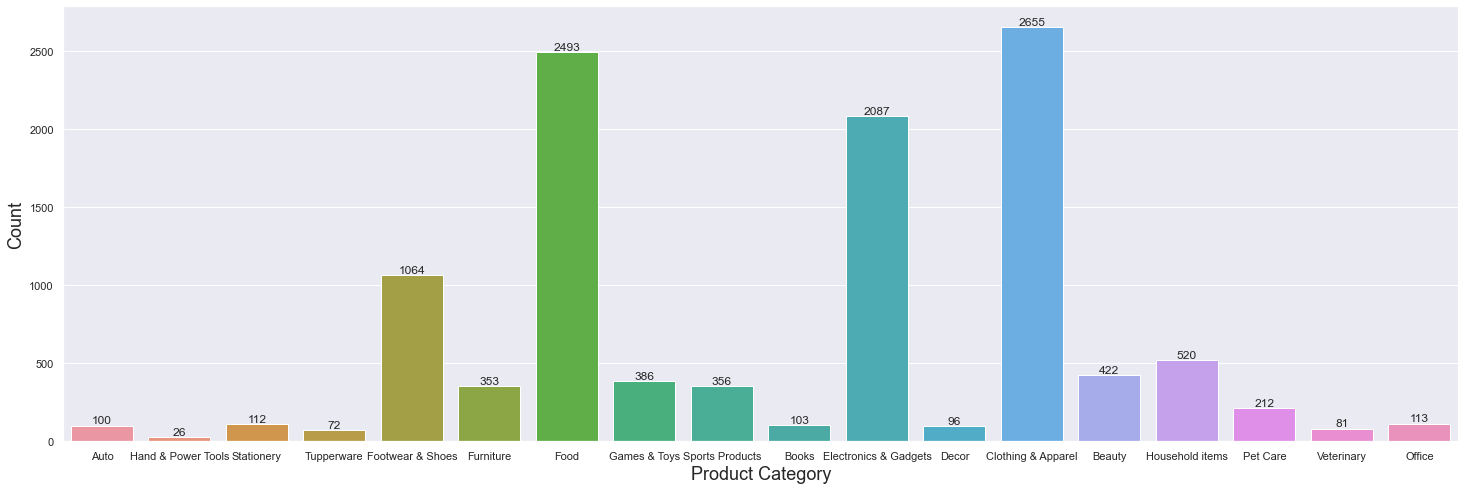

In [148]:
# Plotting a bar graph to show the product categories and their count:

ax = sns.countplot(data = df, x = 'Product_Category')

sns.set(rc={'figure.figsize':(25,8)})
ax.set_xlabel("Product Category",fontsize=18)
ax.set_ylabel("Count",fontsize=18)

for bars in ax.containers:
    ax.bar_label(bars)

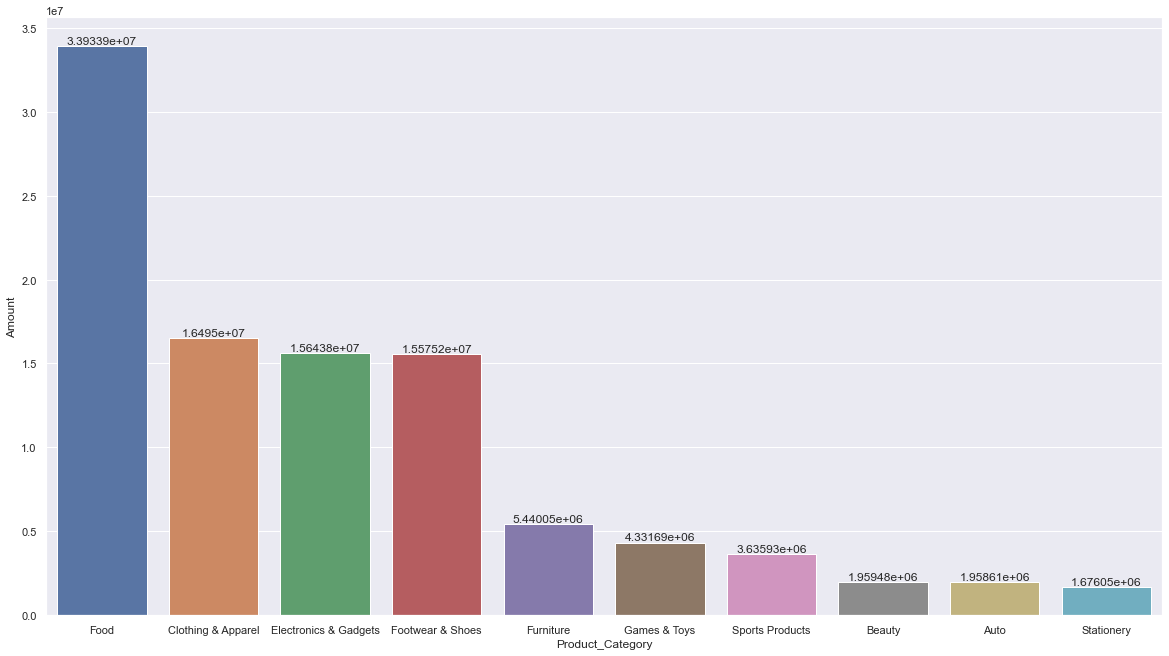

In [163]:
# Plotting the sales of different product categories:

sales_category = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

ax = sns.barplot(data = sales_category, x = 'Product_Category',y= 'Amount')

sns.set(rc={'figure.figsize':(20,11)})

for bars in ax.containers:
    ax.bar_label(bars)

##### From the first graph, we can conclude that the most count of sales is from the category 'Clothing and Apperal', followed by 'Food'. On the contrary, the amount from the sales is the highest for the 'Food' category, by a large margin, followed by 'Clothing and Apparel'.

<Axes: xlabel='Product_ID', ylabel='Orders'>

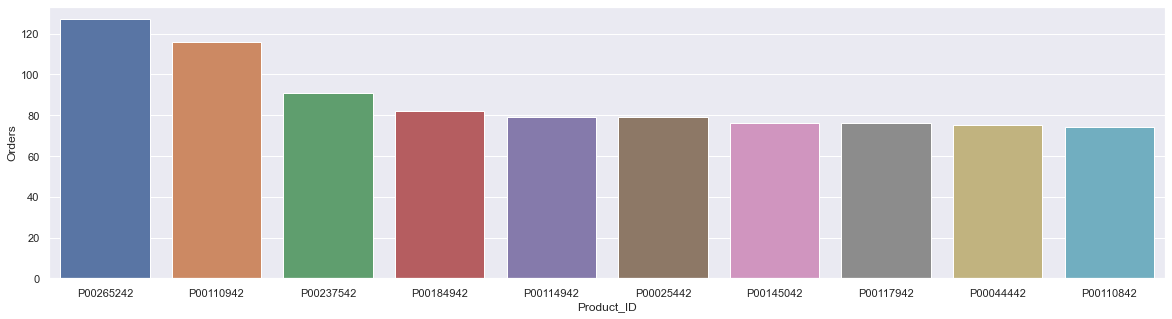

In [165]:
# Plotting the top 10 most sold products:

sales_prod = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(data = sales_prod, x = 'Product_ID',y= 'Orders')

# CONCLUSION

### Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category